In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score)

IMPORT OF DATA

In [2]:
df_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
df_test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [3]:
df_train.shape, df_test.shape

((1296675, 23), (555719, 23))

COMBINE OF DATA WITH TRAIN AND TEST

In [4]:
list(df_train.columns) == list(df_test.columns)

True

In [5]:
df = pd.concat([df_train, df_test])

In [6]:
df.shape

(1852394, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

REMOVE UNNECESSARY DATA -DATA CLEANING

In [8]:
df =df.drop(['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob','merchant' ,'job','trans_num','trans_date_trans_time'],axis=1)

In [9]:
df.head(5)

,Unnamed: 0,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   category    object 
 2   amt         float64
 3   gender      object 
 4   lat         float64
 5   long        float64
 6   city_pop    int64  
 7   unix_time   int64  
 8   merch_lat   float64
 9   merch_long  float64
 10  is_fraud    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 169.6+ MB


ENCODER

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Fit and transform the 'category' column
df['category'] = encoder.fit_transform(df[['category']])
df['gender'] = encoder.fit_transform(df[['gender']])

PLOT

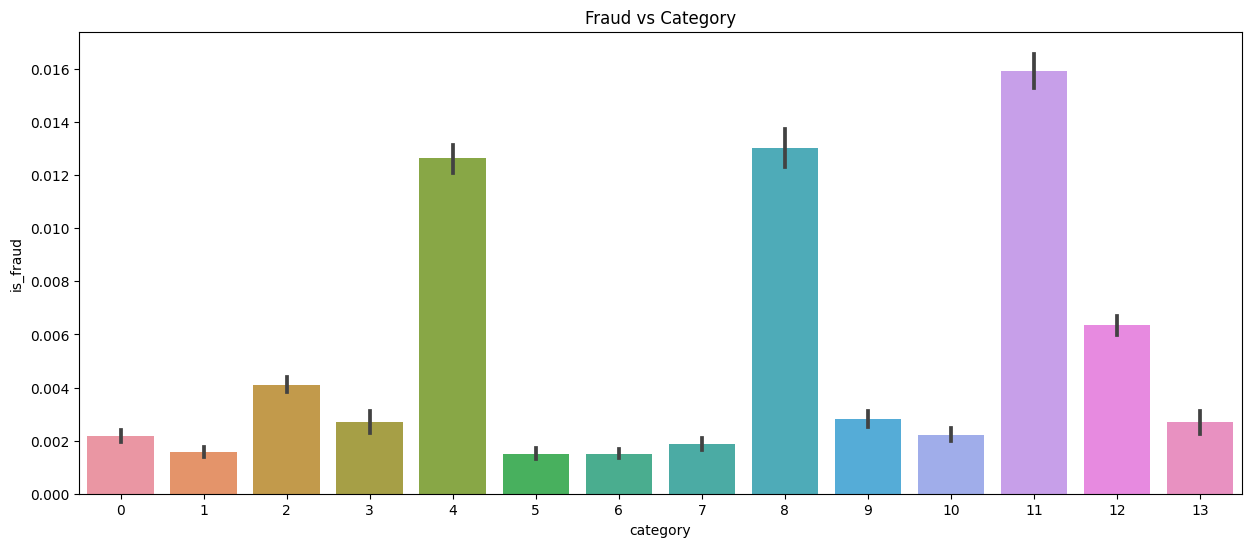

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.barplot(x = 'category', y = 'is_fraud', data = df)
plt.title('Fraud vs Category')
plt.show()

TRAIN AND TEST

In [14]:
x = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

FRAUD PERCENTAGES

In [16]:
fraudulent_count = df['is_fraud'].sum()
legitimate_count = len(df) - fraudulent_count

# Calculate the percentage of fraudulent and legitimate transactions
total_transactions = len(df)
fraudulent_percentage = (fraudulent_count / total_transactions) * 100
legitimate_percentage = (legitimate_count / total_transactions) * 100

print("Fraudulent transactions: {} ({:.2f}%)".format(fraudulent_count, fraudulent_percentage))
print("Legitimate transactions: {} ({:.2f}%)".format(legitimate_count, legitimate_percentage))

Fraudulent transactions: 9651 (0.52%)
Legitimate transactions: 1842743 (99.48%)


LOGISTIC REEGRESSION

In [17]:
lr_1 = LogisticRegression()
lr_1.fit(x_train, y_train)
accuracy_score(y_train, lr_1.predict(x_train))

0.9948229124491488

In [18]:
accuracy_score(y_test, lr_1.predict(x_test))

0.9947131553896843

In [19]:
report = classification_report(y_test, lr_1.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    552781
           1       0.00      0.00      0.00      2938

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719



In [20]:
table_1 = {}
table_1["LOGISTIC REEGRESSION"] = (accuracy_score(y_test, lr_1.predict(x_test)),
                               precision_score(y_test, lr_1.predict(x_test), average='micro'),
                               recall_score(y_test, lr_1.predict(x_test), average='micro'),
                               f1_score(y_test, lr_1.predict(x_test), average='micro'))

DECISION TREE

In [21]:
dt_1= DecisionTreeClassifier()
dt_1.fit(x_train, y_train)
accuracy_score(y_train, dt_1.predict(x_train))

1.0

In [22]:
accuracy_score(y_test, dt_1.predict(x_test))

0.9962517027490513

In [23]:
report = classification_report(y_test, dt_1.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.64      0.67      0.65      2938

    accuracy                           1.00    555719
   macro avg       0.82      0.83      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [24]:
table_1["DECISION TREE"] = (accuracy_score(y_test, dt_1.predict(x_test)),
                               precision_score(y_test, dt_1.predict(x_test), average='micro'),
                               recall_score(y_test, dt_1.predict(x_test), average='micro'),
                               f1_score(y_test, dt_1.predict(x_test), average='micro'))

RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_1 = RandomForestClassifier()
rf_1.fit(x_train, y_train)
accuracy_score(y_train, rf_1.predict(x_train))

0.9999976863901903

In [26]:
accuracy_score(y_test, rf_1.predict(x_test))

0.997624698813609

In [27]:
report = classification_report(y_test, rf_1.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.85      0.67      0.75      2938

    accuracy                           1.00    555719
   macro avg       0.92      0.83      0.87    555719
weighted avg       1.00      1.00      1.00    555719



In [28]:
table_1["RANDOM FOREST"] = (accuracy_score(y_test, rf_1.predict(x_test)),
                               precision_score(y_test, rf_1.predict(x_test), average='micro'),
                               recall_score(y_test, rf_1.predict(x_test), average='micro'),
                               f1_score(y_test, rf_1.predict(x_test), average='micro'))

In [29]:
pd.DataFrame(table_1, index=["accuracy", "precision", "recall", "f1score"])

,LOGISTIC REEGRESSION,DECISION TREE,RANDOM FOREST
accuracy,0.994713,0.996252,0.997625
precision,0.994713,0.996252,0.997625
recall,0.994713,0.996252,0.997625
f1score,0.994713,0.996252,0.997625
